# utilisation d'un catalogue Kerchunk pour ouvrir l'archive Gamar

In [3]:
%%time 
import json
import fsspec
import xarray as xr

HPC_PREFIX  = "/scale/project/lops-oh-fair2adapt/"
HTTPS_PREFIX = "https://data-fair2adapt.ifremer.fr/"
CATALOG_URL  = "https://data-fair2adapt.ifremer.fr/fpaul/tmp/riomar_3months.json"

with fsspec.open(CATALOG_URL, "rt") as f:
    kc = json.load(f)

refs = kc.get("refs", kc.get("references"))
if refs is None:
    raise KeyError("Can't find 'refs' (or 'references') in kerchunk JSON")

def patch_target(x):
    if isinstance(x, str) and x.startswith(HPC_PREFIX):
        return HTTPS_PREFIX + x[len(HPC_PREFIX):]
    return x

for k, v in list(refs.items()):
    if isinstance(v, list) and v and isinstance(v[0], str):
        refs[k] = [patch_target(v[0])] + v[1:]
    elif isinstance(v, str):
        refs[k] = patch_target(v)
# IMPORTANT: pass the dict, not a filename
ds = xr.open_dataset(kc, engine="kerchunk",chunks={})
ds

CPU times: user 1.65 s, sys: 315 ms, total: 1.96 s
Wall time: 2.81 s


<xarray.Dataset> Size: 866GB
Dimensions:              (time_counter: 2208, s_rho: 40, s_w: 41, y_rho: 838,
                          x_rho: 727, y_u: 838, x_u: 726, y_v: 837, x_v: 727,
                          axis_nbounds: 2)
Coordinates: (12/19)
  * time_counter         (time_counter) datetime64[ns] 18kB 2023-12-01T00:48:...
  * s_rho                (s_rho) float32 160B -0.9875 -0.9625 ... -0.0125
  * s_w                  (s_w) float32 164B -1.0 -0.975 -0.95 ... -0.025 nan
  * y_rho                (y_rho) float32 3kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * x_rho                (x_rho) float32 3kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * y_u                  (y_u) float32 3kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...                   ...
    nav_lat_rho          (y_rho, x_rho) float32 2MB dask.array<chunksize=(838, 727), meta=np.ndarray>
    nav_lon_rho          (y_rho, x_rho) float32 2MB dask.array<chunksize=(838, 727), meta=np.ndarray>
    nav_lat_u            (y_u, x_u) float32 2MB dask.array<chunksize=(838, 726), meta=np.ndarray>
    nav_lon_u            (y_u, x_u) float32 2MB dask.array<chunksize=(838, 726), meta=np.ndarray>
    nav_lat_v            (y_v, x_v) float32 2MB dask.array<chunksize=(837, 727), meta=np.ndarray>
    nav_lon_v            (y_v, x_v) float32 2MB dask.array<chunksize=(837, 727), meta=np.ndarray>
Data variables: (12/14)
    hc                   (time_counter) float32 9kB dask.array<chunksize=(1,), meta=np.ndarray>
    theta_s              (time_counter) float32 9kB dask.array<chunksize=(1,), meta=np.ndarray>
    theta_b              (time_counter) float32 9kB dask.array<chunksize=(1,), meta=np.ndarray>
    Tcline               (time_counter) float32 9kB dask.array<chunksize=(1,), meta=np.ndarray>
    Vtransform           (time_counter) float32 9kB dask.array<chunksize=(1,), meta=np.ndarray>
    Cs_r                 (time_counter, s_rho) float32 353kB dask.array<chunksize=(1, 40), meta=np.ndarray>
    ...                   ...
    sc_w                 (time_counter, s_w) float32 362kB dask.array<chunksize=(1, 41), meta=np.ndarray>
    zeta                 (time_counter, y_rho, x_rho) float32 5GB dask.array<chunksize=(1, 838, 727), meta=np.ndarray>
    u                    (time_counter, s_rho, y_u, x_u) float32 215GB dask.array<chunksize=(1, 40, 838, 726), meta=np.ndarray>
    v                    (time_counter, s_rho, y_v, x_v) float32 215GB dask.array<chunksize=(1, 40, 837, 727), meta=np.ndarray>
    temp                 (time_counter, s_rho, y_rho, x_rho) float32 215GB dask.array<chunksize=(1, 40, 838, 727), meta=np.ndarray>
    salt                 (time_counter, s_rho, y_rho, x_rho) float32 215GB dask.array<chunksize=(1, 40, 838, 727), meta=np.ndarray>
Attributes: (12/42)
    name:           GAMAR_GLORYS_1h_inst
    description:    Created by xios
    Conventions:    CF-1.6
    title:          GAMAR_GLORYS
    rst_file:       croco_rst.nc
    grd_file:       croco_grd.nc
    ...             ...
    gamma2_expl:    Slipperiness parameter
    x_sponge:       0.0
    v_sponge:       0.0
    sponge_expl:    Sponge parameters : extent (m) & viscosity (m2.s-1)
    SRCS:           main.F step.F read_inp.F timers_roms.F init_scalars.F ini...
    CPP-options:    REGIONAL GAMAR MPI TIDES OBC_WEST OBC_NORTH XIOS USE_CALE...

In [5]:
#small_ds=ds.isel(x_rho =slice(390,452), y_rho =slice(400,430) )[['temp','salt','zeta']].chunk(chunks={"time_counter":"10M"}).compute()
small_ds=ds.isel(time_counter=0, s_rho=0)[['temp']].compute()
small_ds

<xarray.Dataset> Size: 7MB
Dimensions:       (y_rho: 838, x_rho: 727)
Coordinates:
  * y_rho         (y_rho) float32 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * x_rho         (x_rho) float32 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    time_instant  datetime64[ns] 8B 2023-12-01T00:48:10
    time_counter  datetime64[ns] 8B 2023-12-01T00:48:10
    s_rho         float32 4B -0.9875
    nav_lat_rho   (y_rho, x_rho) float32 2MB -1.0 -1.0 -1.0 ... 50.87 50.87
    nav_lon_rho   (y_rho, x_rho) float32 2MB -1.0 -1.0 -1.0 ... 1.653 1.667 1.68
Data variables:
    temp          (y_rho, x_rho) float32 2MB nan nan nan nan ... nan nan nan nan
Attributes: (12/42)
    name:           GAMAR_GLORYS_1h_inst
    description:    Created by xios
    Conventions:    CF-1.6
    title:          GAMAR_GLORYS
    rst_file:       croco_rst.nc
    grd_file:       croco_grd.nc
    ...             ...
    gamma2_expl:    Slipperiness parameter
    x_sponge:       0.0
    v_sponge:       0.0
    sponge_expl:    Sponge parameters : extent (m) & viscosity (m2.s-1)
    SRCS:           main.F step.F read_inp.F timers_roms.F init_scalars.F ini...
    CPP-options:    REGIONAL GAMAR MPI TIDES OBC_WEST OBC_NORTH XIOS USE_CALE...

In [ ]:
small_ds.temp.plot(y='nav_lat_rho', x='nav_lon_rho', ylim=(42, 52))

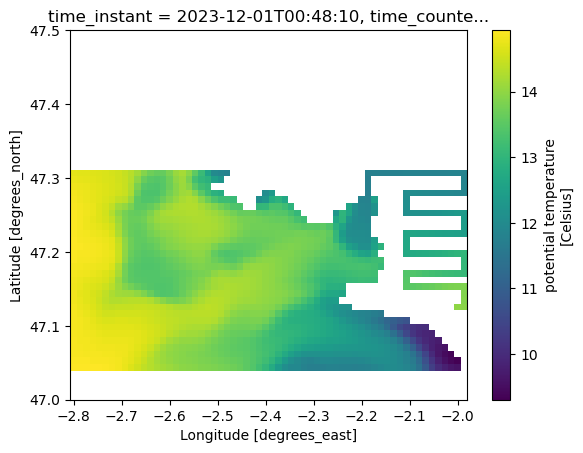

In [6]:
small_ds.temp.isel(x_rho =slice(390,452),y_rho =slice(400,430)).plot(y='nav_lat_rho', x='nav_lon_rho', ylim=(47, 47.5))

## Catalogue Kerchunk local, ouverture avec open_dataset pour usage_courant

## Catalogue Kerchunk local, ouverture avec open_VIRTUAL_dataset
(pour analyse des manifests, réécriture des paths, divers..)

## Catalogue kerchunk http

- Note Fred : ca marche a l'exterieur d'ifremer, mais pas depuis le hpc ifremer par exemple (timeout!)...
- Avec Colab, ca fonctionne : https://colab.research.google.com/drive/18MWwjhNEaWMdhhcWun_3sfS6uZYJishs#scrollTo=oRdXBDrF34sy

TODO ? (là c'est moche! mais ca marche)
Utilisation d'un script shell pour modifier les paths des fichiers, et en faire des urls valides au lieu des chemins locaux. Voir comment faire ca directement en python avec l'api kerchunk si possible